# SVD AND FACE RECOGNITION
## This code will show how to approximate human faces using SVD with some matrices of lower rank

### The Dataset can be download at https://www.kaggle.com/datasets/ashwingupta3012/human-faces



In [ ]:
## Import libraries

import pandas as pd
import numpy as np
!pip install kaggle
import os
from os import listdir
import glob
import cv2 as cv2
import cv2 as cv
import zipfile
from PIL import Image
from numpy import asarray
from PIL import Image, ImageDraw
import numpy as np
from IPython.display import display
import os


In [2]:
## Set directory
%cd /content

/content


In [ ]:
## Import file
from google.colab import files
files.upload()

In [6]:
## Set credentials
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
## Download the data
!kaggle datasets download -d ashwingupta3012/human-faces

In [8]:
## Unzip the file
!unzip -q "/content/human-faces.zip" -d "/content/human-faces"

In [ ]:
## Print first 10 images

folder_path = "/content/human-faces/Humans"  # Replace with the actual folder path
new_width = 128
new_height = 128
list_of_arrays = []
column_names = []

# Iterate over the files in the folder
for i, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith(".jpg"):
        file_path = os.path.join(folder_path, filename)

        # Open the image using PIL
        image = Image.open(file_path)

        # Resize the image to the specified dimensions
        img = image.resize((new_width, new_height))

        # Convert the image to grayscale
        grayscale_image = img.convert('L')

        # Convert the grayscale image to a NumPy array
        image_array = np.array(grayscale_image)

        # Append the image array to the list of arrays
        list_of_arrays.append(image_array.flatten())

        # Create a column name based on the file name
        column_name = f"person{i+1}"
        column_names.append(column_name)

        # Display or perform further processing with the grayscale image
        # grayscale_image.show()

        # Break the loop after processing the first 10 images
        if i == 50:
            break

# Create a DataFrame from the list of arrays and column names
df = pd.DataFrame(np.column_stack(list_of_arrays), columns=column_names)

# Print the DataFrame
print(df)

In [ ]:
df

In [ ]:
len(list_of_arrays)

In [ ]:
## Obtain mean face

avgFace = np.mean(df, axis=1)
print(avgFace)

In [39]:
## Compute Eigenfaces

X = df - np.tile(avgFace, (df.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)

In [ ]:
## Print Eigenvalues

print(S)

In [ ]:
## Reconstruct Faces

# Initialize variables
last_file_path = None

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        last_file_path = os.path.join(folder_path, filename)

# Check if a JPG file was found
if last_file_path is not None:
    # Open the image using PIL
    image = Image.open(last_file_path)

    # Resize the image to the specified dimensions
    new_width = 128
    new_height = 128
    resized_image = image.resize((new_width, new_height))

    # Convert the resized image to grayscale
    grayscale_image = resized_image.convert('L')

    # Convert the grayscale image to a NumPy array
    last_image_array = np.array(grayscale_image)

    # Perform SVD analysis on the image array
    # ... (your SVD code here)

    # Display the original image
    image.show()

else:
    print("No JPG files found in the folder.")

In [58]:
## Print array of the last_image
print(last_image_array)
print(avgFace)

[[ 0  0  0 ...  3  2  2]
 [ 0  0  0 ...  3  3  3]
 [ 0  0  0 ...  2  2  2]
 ...
 [21 21 21 ... 29 17 15]
 [21 21 21 ... 21 16 14]
 [21 21 21 ... 19 17 13]]
0        133.94
1        134.56
2        133.90
3        132.14
4        132.12
          ...  
16379     85.54
16380     89.28
16381     94.36
16382     95.04
16383     96.32
Length: 16384, dtype: float64


In [77]:
# Assuming you already have last_image_array and avgFace

# Convert the last image array to a transposed vector
last_image_vector = last_image_array.flatten().reshape(1, -1)

# Transpose the vector to shape (16348, 1)
testFaceMs_transposed = np.transpose(last_image_vector)

# Print the transposed vector
testFace = testFaceMs_transposed.flatten()
print(testFaceMs_transposed)
print(testFace)


[[ 0]
 [ 0]
 [ 0]
 ...
 [19]
 [17]
 [13]]
[ 0  0  0 ... 19 17 13]


In [79]:
# Subtract the last_image_vector from avgFace_vector
testFaceMs = testFace - avgFace
print(testFaceMs)

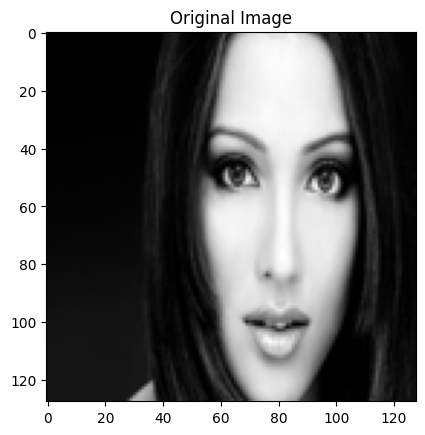

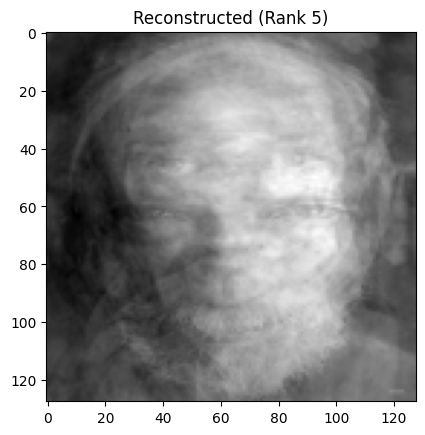

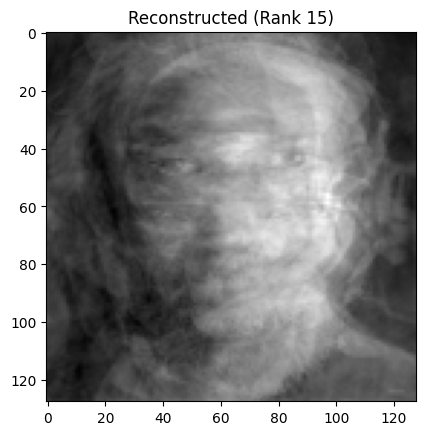

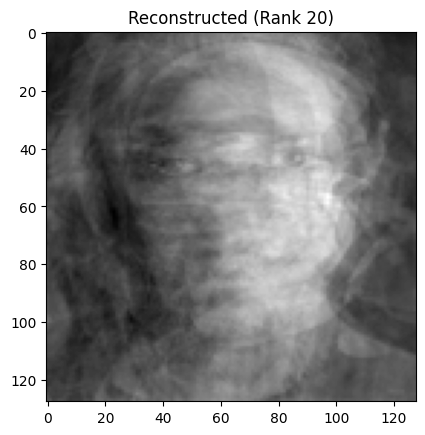

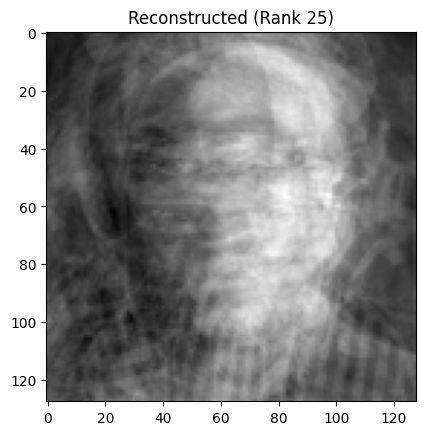

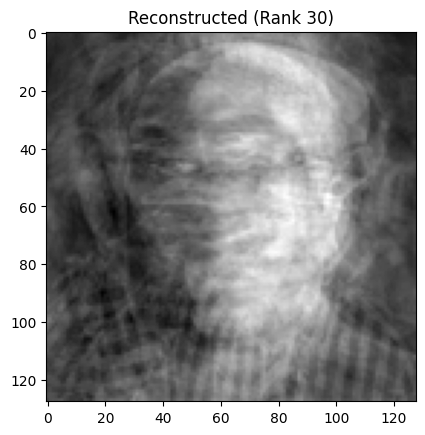

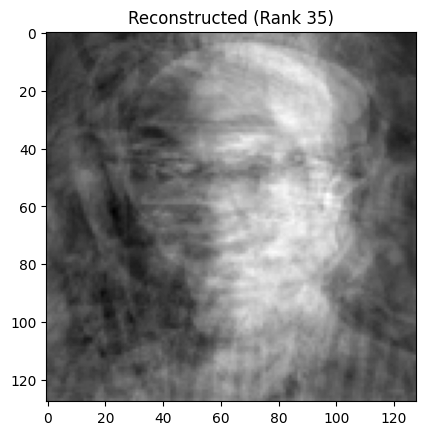

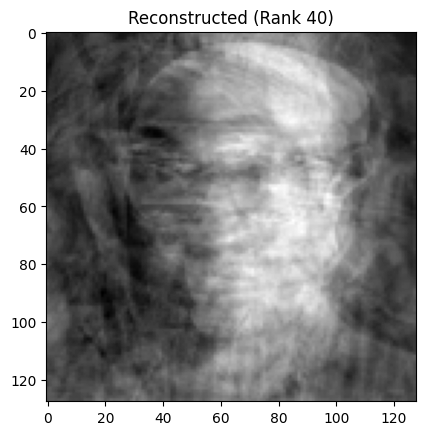

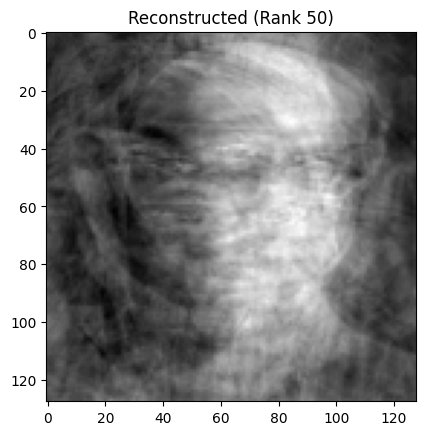

In [88]:
import matplotlib.pyplot as plt

# Display the original image
plt.imshow(last_image_array, cmap='gray')
plt.title('Original Image')
plt.show()

# Initialize the rank matrix
r_list = [5, 15, 20, 25, 30, 35, 40, 50]

# Iterate over the ranks and reconstruct the faces
for r in r_list:
    # Reconstruct the face of person 41 using a reduced number of eigenfaces

    # Convert avgFace to a NumPy array
    avgFace_array = avgFace.to_numpy()

    # Reshape the avgFace_array
    avgFace_reshaped = avgFace_array.reshape(-1, 1)

    testFace_array = testFaceMs.to_numpy()
    testFace_reshaped = testFace_array.reshape(-1, 1)

    reconstructed_face_person41 = avgFace + U[:, :r] @ U[:, :r].T @ testFaceMs

    # Convert the reconstructed face to a NumPy array and reshape it
    reconstructed_face_person41_array = reconstructed_face_person41.to_numpy()
    reconstructed_face_person41_reshaped = reconstructed_face_person41_array.reshape(new_width, new_height)

    # Display the reconstructed face
    plt.imshow(reconstructed_face_person41_reshaped, cmap='gray')
    plt.title(f'Reconstructed (Rank {r})')
    plt.show()